### 0. Introduction

This project explores the statistical modeling of a population of sources emitting gravitational waves. The primary objectives are to analyze the probability distribution of the number of sources within a spherical shell, determine the mean and variance of these sources, understand how the strain amplitude changes with distance, and assess the detection efficiency of these sources as a function of distance and source density.

In [1]:
# Libraries
library(ggplot2)

### 1. Probability distribution of the number of sources in a spherical shell

**Objective:**  
To determine the probability distribution of the number of sources within a spherical shell centered on the Sun.

**Approach:**

- Density and Shell Parameters:
  We start with a low density of sources ($n = 1 \times 10^{-6}$) sources per cubic unit), a spherical shell with a radius (R) of 1000 units, and a thickness ($\Delta R$) of 1 unit.
  
- Volume Calculation:
  The volume V of the spherical shell is calculated using the formula:
  $$
  V = \frac{4}{3} \pi R^3 - \frac{4}{3} \pi (R - \Delta R)^3
  $$
  
- Expected Number of Sources:
  The expected number of sources ($\lambda$) within the shell is derived from:
  $$
  \lambda = n \times V
  $$
  
- Probability Distribution:
  Using the Poisson distribution, we calculate the probabilities of observing 0 to 20 sources in the shell.


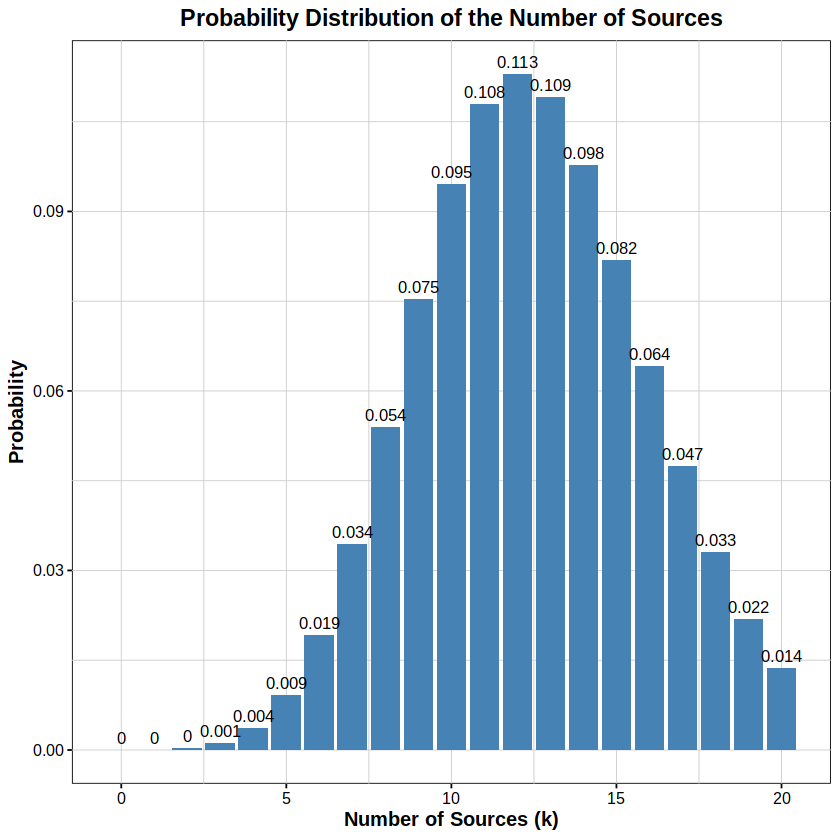

In [2]:
# Parameters
n = 1e-6  # density of the population
R = 1000  # radius of the spherical shell
delta_R = 1  # thickness of the spherical shell
h0 = 1  # maximum strain at reference distance
w = 0.1 * h0  # width parameter for the detection efficiency function
num_simulations = 1000  # number of simulations for uncertainty analysis

V = ((4/3) * pi * R^3) - ((4/3) * pi * (R - delta_R)^3) # volume
lambda = n * V  # expected number of sources in the shell

data_prob = data.frame(
    k = 0:20, 
    probability = dpois(0:20, lambda)
)

ggplot(data_prob, aes(x = k, y = probability)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(title = "Probability Distribution of the Number of Sources",
         x = "Number of Sources (k)",
         y = "Probability") +
    geom_text(aes(label = round(probability, 3)), vjust = -0.5, size = 3.5) +
    theme(
        text = element_text(size=12),
        axis.title.x = element_text(face="bold", size=12),
        axis.title.y = element_text(face="bold", size=12),
        axis.text = element_text(color="black"),
        axis.ticks = element_line(color="black"),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        panel.background = element_rect(fill = "white", color = "black"),
        panel.grid.major = element_line(linewidth=0.25, linetype='solid', color="grey80"),
        panel.grid.minor = element_line(linewidth=0.25, linetype='solid', color="grey80"))

### 2. Mean and variance of the number of sources in the shell

Objective:
To calculate the mean and variance of the number of sources within the spherical shell.

Approach:
- Mean: For a Poisson distribution, the mean number of sources ($\lambda$) is equal to the expected number of sources.
- Variance: The variance for a Poisson distribution is also equal to $\lambda$.

In [3]:
mean_sources = lambda
variance_sources = lambda

cat("The most probable number of sources that we can find in a shell with thickness", delta_R, 
    "that distance", R, "from the sun is:", mean_sources, '\n')
cat("With a variance of:", variance_sources, '\n')

The most probable number of sources that we can find in a shell with thickness 1 that distance 1000 from the sun is: 12.55381 
With a variance of: 12.55381 


### 3. Strain vs Distance

**Objective:**  
To determine how the strain amplitude ($h$) changes as a function of the distance ($r$) from the source.

**Approach:**

- Inverse Relationship: Assuming $h \propto \frac{1}{r}$, where $h$ is the strain and $r$ is the distance.
  
- Strain Calculation: Calculate $h$ for distances ranging from 0.1 to 10 units using the formula:
  $$
  h = \frac{h_0}{r}
  $$


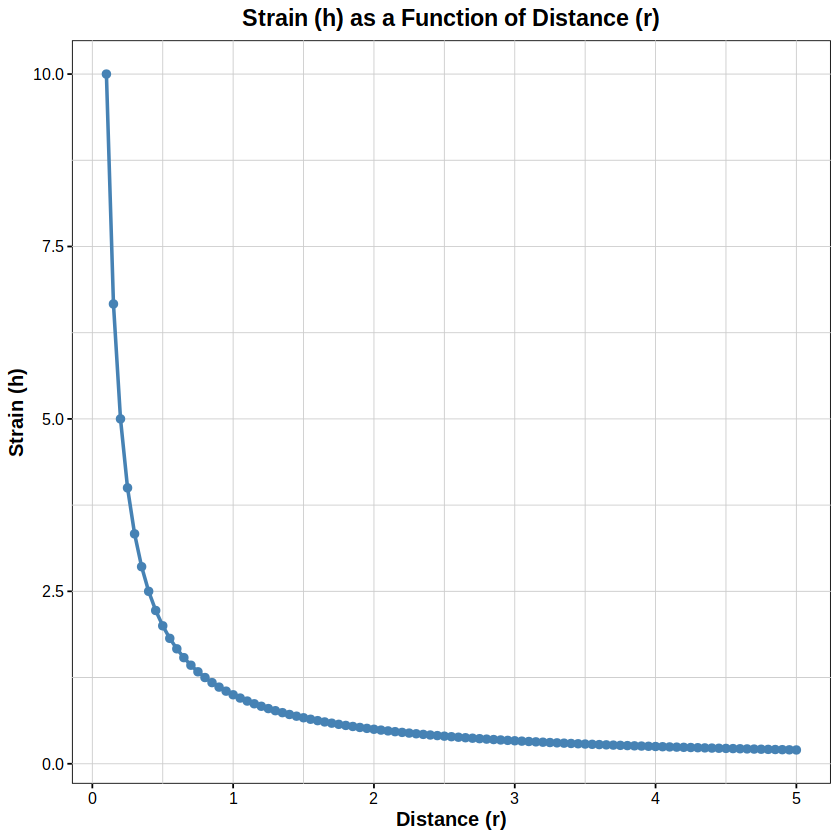

In [4]:
r = seq(0.1, 5, by = 0.05)
h = h0 / r

data_strain = data.frame(r = r, h = h)

ggplot(data_strain, aes(x = r, y = h)) +
    geom_line(color = "steelblue", linewidth = 1) +
    labs(title = "Strain (h) as a Function of Distance (r)",
         x = "Distance (r)",
         y = "Strain (h)") +
    geom_point(size = 2, color = "steelblue") +
    theme(
        text = element_text(size=12),
        axis.title.x = element_text(face="bold", size=12),
        axis.title.y = element_text(face="bold", size=12),
        axis.text = element_text(color="black"),
        axis.ticks = element_line(color="black"),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        panel.background = element_rect(fill = "white", color = "black"),
        panel.grid.major = element_line(linewidth=0.25, linetype='solid', color="grey80"),
        panel.grid.minor = element_line(linewidth=0.25, linetype='solid', color="grey80"))

### 4.1 Detection efficiency as a function of distance

**Objective:**  
To find the dependency of the detection efficiency ($\epsilon$) with distance beyween the observer and the source.

**Approach:**

- Gaussian Integral: Detection efficiency is modeled using a Gaussian integral.

  The detection efficiency function is defined as:
  $$
  \epsilon(h, h_0, w) = \int_{-\infty}^{h} \frac{\exp\left( -\frac{(h' - h_0)^2}{2 w^2} \right)}{\sqrt{2 \pi} w} \, dh'
  $$

- Efficiency Calculation: Calculate $\epsilon$ for different distances using the defined detection efficiency function.

**Function Description:**

The `detection_efficiency` function calculates the detection efficiency using a Gaussian integral. The function takes the following parameters:

- `h`: Strain amplitude.
- `h0`: Initial strain amplitude.
- `w`: Width parameter for the detection efficiency function.

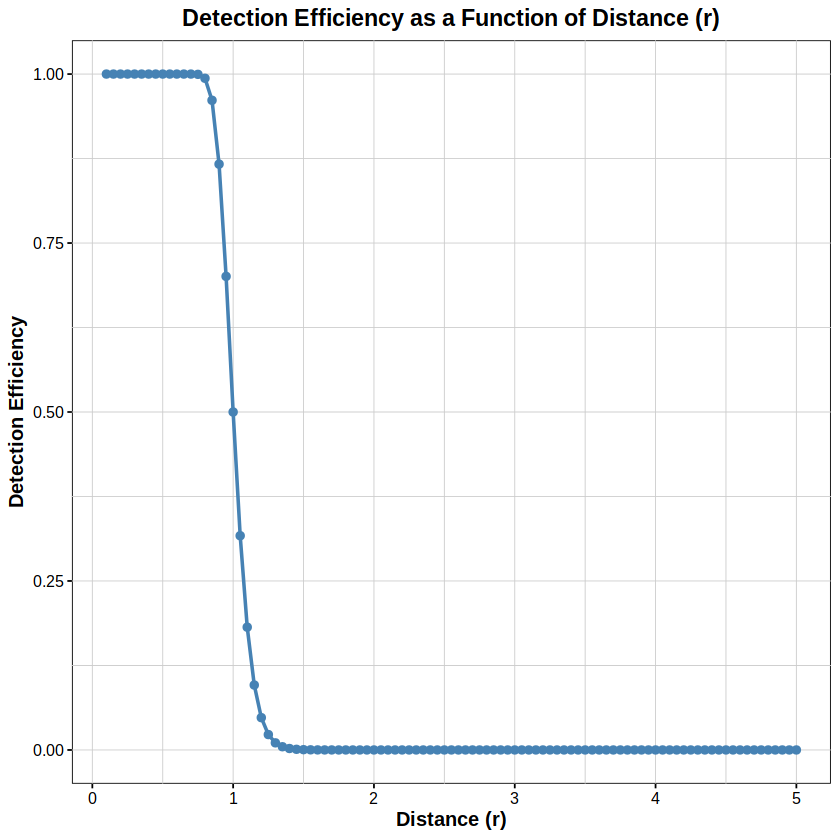

In [5]:
detection_efficiency = function(h, h0, w) {
    integrate(function(h_prime) {
        exp(-(h_prime - h0)^2 / (2 * w^2)) / (sqrt(2 * pi) * w)
    }, -Inf, h)$value
}

h_values = h0 / r

efficiencies = sapply(h_values, detection_efficiency, h0 = h0, w = w)

data_efficiency = data.frame(r = r, h = h_values, efficiency = efficiencies)

ggplot(data_efficiency, aes(x = r, y = efficiency)) +
    geom_line(color = "steelblue", linewidth = 1) +
    labs(title = "Detection Efficiency as a Function of Distance (r)",
         x = "Distance (r)",
         y = "Detection Efficiency") +
    geom_point(size = 2, color = "steelblue") +
    theme(
        text = element_text(size=12),
        axis.title.x = element_text(face="bold", size=12),
        axis.title.y = element_text(face="bold", size=12),
        axis.text = element_text(color="black"),
        axis.ticks = element_line(color="black"),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        panel.background = element_rect(fill = "white", color = "black"),
        panel.grid.major = element_line(linewidth=0.25, linetype='solid', color="grey80"),
        panel.grid.minor = element_line(linewidth=0.25, linetype='solid', color="grey80"))

### 4.2 Detection efficiency and its uncertainty as a function of source density

**Objective:**  
To analyze how detection efficiency and its uncertainty change with varying source densities.

**Approach:**

- Simulation: Simulate detection efficiency for different source densities.
  
- Efficiency Calculation: For each source density, calculate the mean and standard deviation of the detection efficiency using a Poisson process.

**Function Description:**

The `simulate_detection_efficiency` function simulates detection efficiency for given source densities and calculates the mean and standard deviation of the detection efficiency. The function takes the following parameters:

- `n`: Source density.
- `h0`: Initial strain amplitude.
- `w`: Width parameter for the detection efficiency function.
- `R`: Radius of the spherical shell.
- `delta_R`: Thickness of the spherical shell.

The function works as follows:

1. Calculate the volume \( V \) of the spherical shell:
   $$
   V = 4 \pi R^2 \Delta R
   $$

2. Calculate the expected number of sources (\( \lambda \)) within the shell:
   $$
   \lambda = n \times V
   $$

3. Initialize an array to store detection efficiencies for each simulation.

4. For each simulation:
   - Draw a random number \( k \) from a Poisson distribution with mean \( \lambda \).
   - If \( k \) is greater than 0:
     - Generate \( k \) random distances \( r \) uniformly distributed within the shell.
     - Calculate the strain \( h \) for each distance:
       $$
       h = \frac{h_0}{r}
       $$
     - Calculate the detection efficiency for each strain using a predefined `detection_efficiency` function.
     - Store the mean detection efficiency for this simulation.
   - If \( k \) is 0, store a detection efficiency of 0 for this simulation.

5. Return the mean and standard deviation of the detection efficiencies across all simulations.

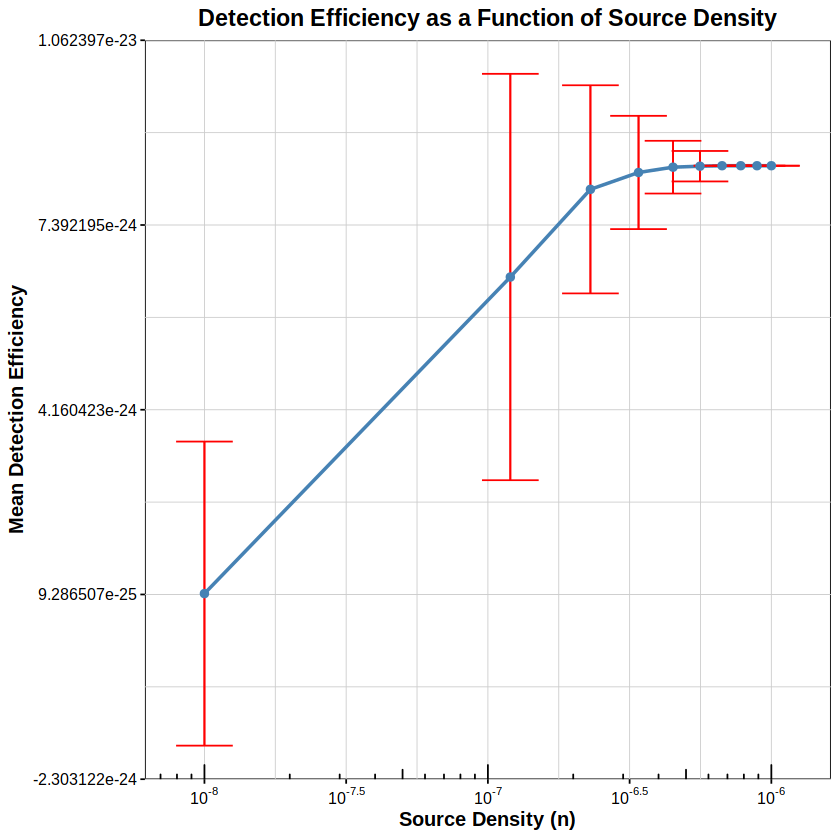

In [6]:
#function to simulate detection efficiency for a given source density n
simulate_detection_efficiency = function(n, h0, w, R, delta_R) {
    V = 4 * pi * R^2 * delta_R
    lambda = n * V
    
    efficiencies = numeric(num_simulations)
    for (i in 1:num_simulations) {
        k = rpois(1, lambda)
        if (k > 0) {
            r = runif(k, R - delta_R / 2, R + delta_R / 2)
            h = h0 / r
            eff = sapply(h, detection_efficiency, h0 = h0, w = w)
            efficiencies[i] = mean(eff)
        } else {
            efficiencies[i] = 0
        }
    }
    list(mean_efficiency = mean(efficiencies), sd_efficiency = sd(efficiencies))
}


source_densities = seq(1e-8, 1e-6, length.out = 10)

results = lapply(source_densities, function(n) {
    simulate_detection_efficiency(n, h0, w, R, delta_R)
})

df = data.frame(
    density = source_densities,
    mean_efficiency = sapply(results, function(res) res$mean_efficiency),
    sd_efficiency = sapply(results, function(res) res$sd_efficiency)
)

ggplot(df, aes(x = density, y = mean_efficiency)) +
    geom_line(color = "steelblue", linewidth = 1) +
    geom_errorbar(aes(ymin = mean_efficiency - sd_efficiency, ymax = mean_efficiency + sd_efficiency),
                  width = 0.2, color = "red") +
    geom_linerange(aes(ymin = mean_efficiency - sd_efficiency, ymax = mean_efficiency + sd_efficiency), color = "red") +
    labs(title = "Detection Efficiency as a Function of Source Density",
         x = "Source Density (n)",
         y = "Mean Detection Efficiency") +
    geom_point(size = 2, color = "steelblue") +
    scale_x_log10(
        breaks = scales::trans_breaks("log10", function(x) 10^x),
        labels = scales::trans_format("log10", scales::math_format(10^.x))
    ) +
    annotation_logticks(sides = "b") +
    theme(
        text = element_text(size=12),
        axis.title.x = element_text(face="bold", size=12),
        axis.title.y = element_text(face="bold", size=12),
        axis.text = element_text(color="black"),
        axis.ticks = element_line(color="black"),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        panel.background = element_rect(fill = "white", color = "black"),
        panel.grid.major = element_line(linewidth=0.25, linetype='solid', color="grey80"),
        panel.grid.minor = element_line(linewidth=0.25, linetype='solid', color="grey80"))